In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/assessment/Consumer Complaint.csv")

In [3]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282350,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,"CITIBANK, N.A.",MO,63301,NaN,NaN,Web,12/02/2011,Closed with relief,Yes,No,2396
1282351,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,NaN,NaN,Web,12/06/2011,Closed without relief,No,No,2323
1282352,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,43207,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126
1282353,12/01/2011,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,NaN,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315


In [4]:

df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235166
Issue                                 0
Sub-issue                        531186
Consumer complaint narrative     898791
Company public response          833273
Company                               0
State                             19400
ZIP code                         115298
Tags                            1106712
Consumer consent provided?       591701
Submitted via                         0
Date sent to company                  0
Company response to consumer          7
Timely response?                      0
Consumer disputed?               513854
Complaint ID                          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via                 1282355 non-

In [6]:
df.describe()

,Complaint ID
count,1.282355e+06
mean,1.929831e+06
std,9.645326e+05
min,1.000000e+00
25%,1.124152e+06
50%,2.123218e+06
75%,2.798886e+06
max,3.238682e+06


In [7]:
df.duplicated().sum()

0

In [8]:
df.Tags.unique()


array(['Older American', nan, 'Servicemember',
       'Older American, Servicemember'], dtype=object)

In [9]:
df['Tags'].value_counts()

Servicemember                    84654
Older American                   76981
Older American, Servicemember    14008
Name: Tags, dtype: int64

In [10]:
df['Consumer disputed?'].value_counts()

No     620123
Yes    148378
Name: Consumer disputed?, dtype: int64

In [11]:
df['Product'].value_counts()

Mortgage                                                                        278098
Debt collection                                                                 244873
Credit reporting, credit repair services, or other personal consumer reports    225978
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     51685
Credit card or prepaid card                                                      47653
Checking or savings account                                                      40641
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            11377
Money transfer, virtual currency, or money 

In [12]:
df['Sub-product'].unique()

array(['Checking account', 'Other banking product or service',
       'Payday loan debt', 'Credit reporting', 'Other type of mortgage',
       'Other debt', 'Federal student loan servicing', 'Loan',
       'Medical debt', 'I do not know', 'Credit card debt',
       'Private student loan', 'Savings account', 'Auto debt',
       'Other personal consumer report', 'Conventional home mortgage',
       'General-purpose credit card or charge card', 'Payday loan',
       'Personal line of credit', 'VA mortgage', 'Installment loan',
       'Private student loan debt', 'Lease', 'Store credit card',
       'Domestic (US) money transfer',
       "Traveler's check or cashier's check", 'Title loan',
       'FHA mortgage', 'Reverse mortgage',
       'Home equity loan or line of credit (HELOC)', 'Mortgage debt',
       'Virtual currency', 'Mobile or digital wallet',
       'Federal student loan debt', 'General-purpose prepaid card',
       'International money transfer', 'CD (Certificate of Deposit)',

In [13]:
df['Issue'].value_counts()

Incorrect information on your report          134338
Loan modification,collection,foreclosure      112311
Incorrect information on credit report        102686
Loan servicing, payments, escrow account       77333
Cont'd attempts collect debt not owed          60687
                                               ...  
Property was sold                                  5
Lender damaged or destroyed property               3
Property was damaged or destroyed property         3
Problem with an overdraft                          2
Cannot afford Payments                             1
Name: Issue, Length: 167, dtype: int64

In [14]:
df['Consumer complaint narrative'].nunique()

366945

In [15]:
df['Company public response'].unique()

array([nan,
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company disputes the facts presented in the complaint',
       'Company believes the complaint is the result of a misunderstanding',
       "Company can't verify or dispute the facts in the complaint",
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company chooses not to provide a public response'], dtype=object)

In [16]:
df['Company public response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            311852
Company believes it acted appropriately as authorized by contract or law                                                    61135
Company chooses not to provide a public response                                                                            52473
Company believes the complaint is the result of a misunderstanding                                                           5674
Company disputes the facts presented in the complaint                                                                        5257
Company believes complaint caused principally by actions of third party outside the control or direction of the company      3989
Company believes complaint is the result of an isolated error                                                                3728
Company believes complaint represents an opportunity for improvement to better serve consu

In [17]:
df['Company'].nunique()

5275

In [18]:
df['State'].nunique()

63

In [19]:
df['ZIP code'].nunique()

22591

In [20]:
df['Consumer consent provided?'].value_counts()

Consent provided        383885
Consent not provided    285087
Other                    20482
Consent withdrawn         1200
Name: Consumer consent provided?, dtype: int64

In [21]:
df['Submitted via'].value_counts()

Web            945329
Referral       173640
Phone           76509
Postal mail     67522
Fax             18972
Email             383
Name: Submitted via, dtype: int64

In [22]:
df['Company response to consumer'].value_counts()

Closed with explanation            993221
Closed with non-monetary relief    158716
Closed with monetary relief         74243
Closed without relief               17868
Closed                              17611
In progress                          9277
Untimely response                    6108
Closed with relief                   5304
Name: Company response to consumer, dtype: int64

In [23]:
df['Timely response?'].value_counts()

Yes    1250162
No       32193
Name: Timely response?, dtype: int64

<AxesSubplot:xlabel='Tags', ylabel='count'>

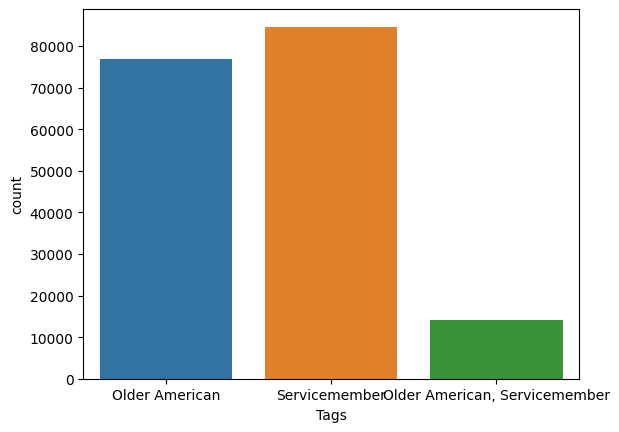

In [24]:
sns.countplot(data=df,x='Tags')

<AxesSubplot:xlabel='count', ylabel='Product'>

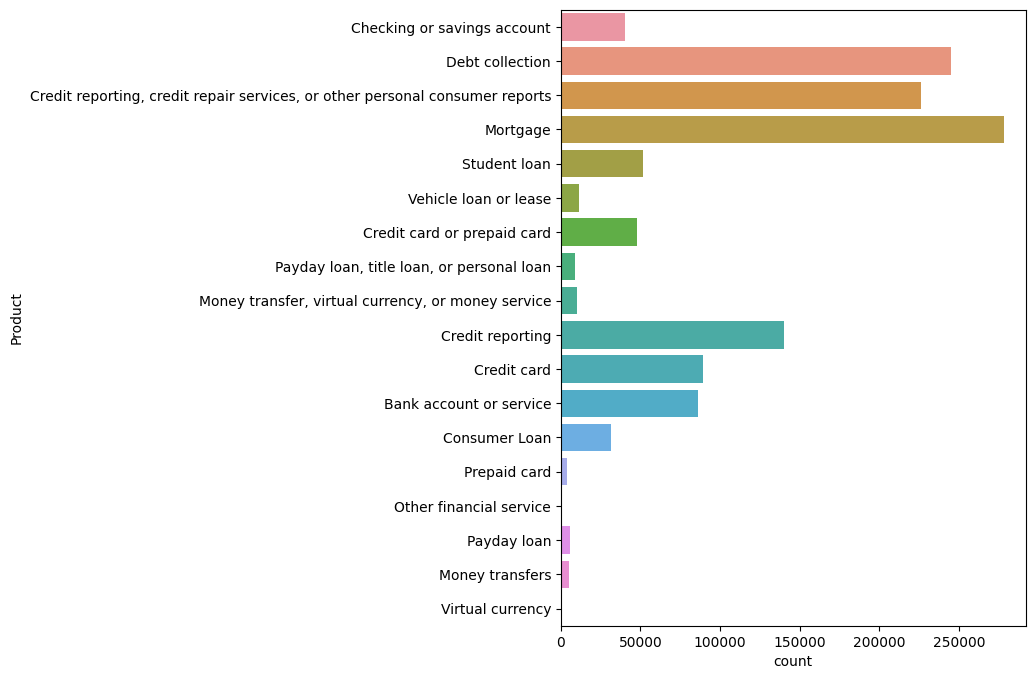

In [25]:
plt.figure(figsize=(6,8))
sns.countplot(data=df,y=df['Product'])

In [26]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [27]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

In [28]:
import warnings
warnings.filterwarnings('ignore')


In [29]:
df.columns=df.columns.str.title()

In [30]:
df.columns

Index(['Date Received', 'Product', 'Sub-Product', 'Issue', 'Sub-Issue',
       'Consumer Complaint Narrative', 'Company Public Response', 'Company',
       'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?',
       'Submitted Via', 'Date Sent To Company', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?', 'Complaint Id'],
      dtype='object')

In [31]:
df.columns.str.title()

Index(['Date Received', 'Product', 'Sub-Product', 'Issue', 'Sub-Issue',
       'Consumer Complaint Narrative', 'Company Public Response', 'Company',
       'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?',
       'Submitted Via', 'Date Sent To Company', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?', 'Complaint Id'],
      dtype='object')

In [32]:
mode_value= df['Consumer Disputed?'].mode()

In [33]:
mode_value

0    No
Name: Consumer Disputed?, dtype: object

In [34]:
total = df.isnull().sum().sort_values(ascending=False)

In [35]:
total

Tags                            1106712
Consumer Complaint Narrative     898791
Company Public Response          833273
Consumer Consent Provided?       591701
Sub-Issue                        531186
Consumer Disputed?               513854
Sub-Product                      235166
Zip Code                         115298
State                             19400
Company Response To Consumer          7
Date Sent To Company                  0
Timely Response?                      0
Date Received                         0
Submitted Via                         0
Product                               0
Company                               0
Issue                                 0
Complaint Id                          0
dtype: int64

In [36]:
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [37]:
d=pd.concat([total,percent],axis=1,keys=('Total','percent'))
(d[~(d['Total'] == 0)])

,Total,percent
Tags,1106712,86.303091
Consumer Complaint Narrative,898791,70.089094
Company Public Response,833273,64.979900
Consumer Consent Provided?,591701,46.141747
Sub-Issue,531186,41.422695
Consumer Disputed?,513854,40.071119
Sub-Product,235166,18.338604
Zip Code,115298,8.991114
State,19400,1.512842
Company Response To Consumer,7,0.000546


In [38]:

df[['Date Received','Product','Sub-Product','Issue','Sub-Issue','Consumer Complaint Narrative','Company Public Response','Company','State','Zip Code','Tags','Consumer Consent Provided?','Submitted Via','Date Sent To Company','Company Response To Consumer','Timely Response?','Consumer Disputed?']].describe().transpose()

,count,unique,top,freq
Date Received,1282355,2717,09/08/2017,3553
Product,1282355,18,Mortgage,278098
Sub-Product,1047189,76,Credit reporting,221652
Issue,1282355,167,Incorrect information on your report,134338
Sub-Issue,751169,218,Information belongs to someone else,59168
Consumer Complaint Narrative,383564,366945,There are many mistakes appear in my report wi...,978
Company Public Response,449082,10,Company has responded to the consumer and the ...,311852
Company,1282355,5275,"EQUIFAX, INC.",115703
State,1262955,63,CA,176009
Zip Code,1167057,22591,300XX,7294


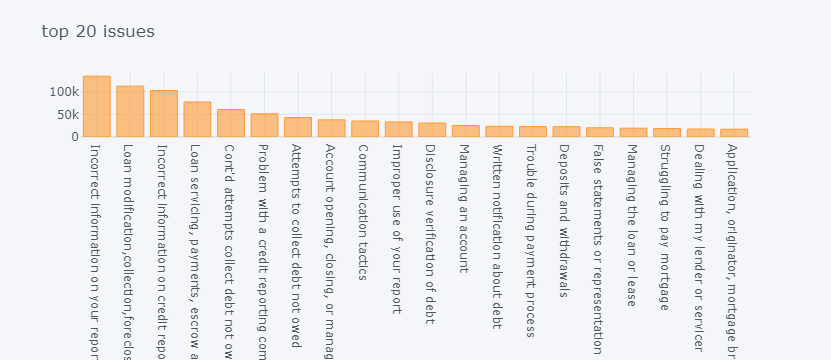

In [39]:

df['Issue'].value_counts()[0:20].iplot(kind='bar',title='top 20 issues',fontsize=14)

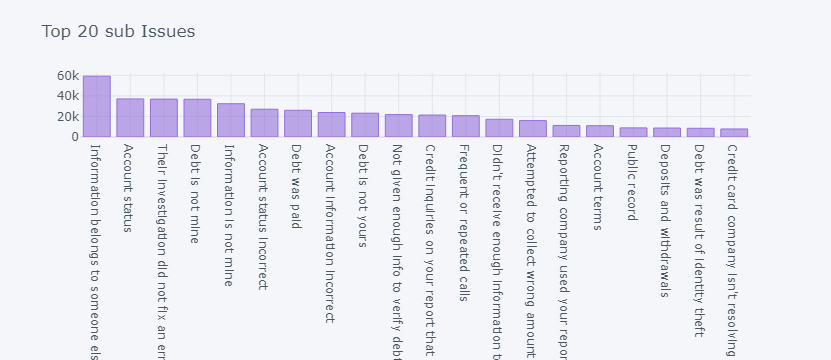

In [40]:
df['Sub-Issue'].str.strip("'").value_counts()[0:20].iplot(kind = 'bar',fontsize=14,title = 'Top 20 sub Issues',color='#9370DB')

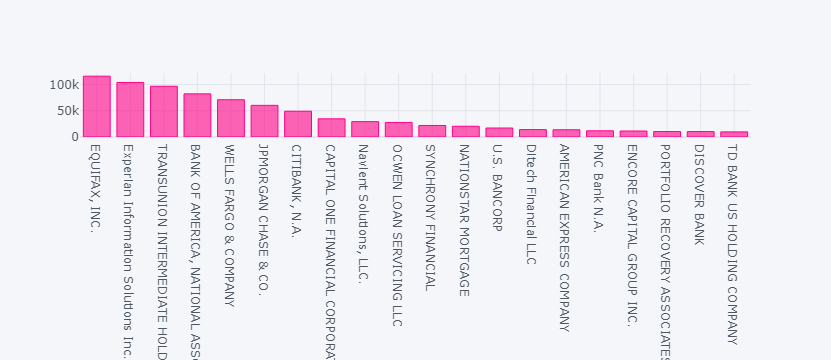

In [41]:
df['Company'].value_counts()[0:20].iplot(kind='bar',fontsize=14,color='pink')

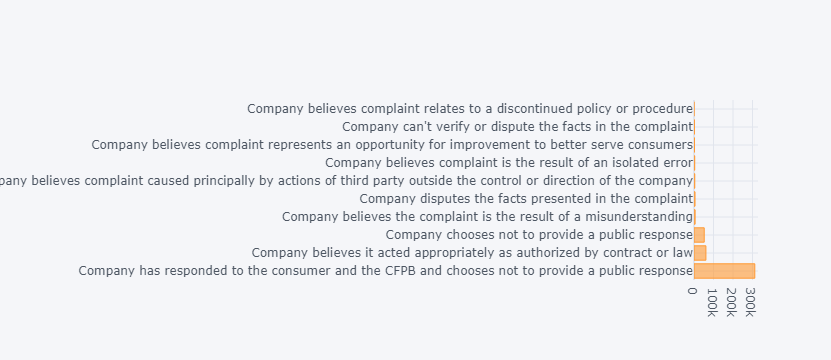

In [42]:
df['Company Public Response'].value_counts().iplot(kind='barh',fontsize=14)

<AxesSubplot:xlabel='count', ylabel='Company Public Response'>

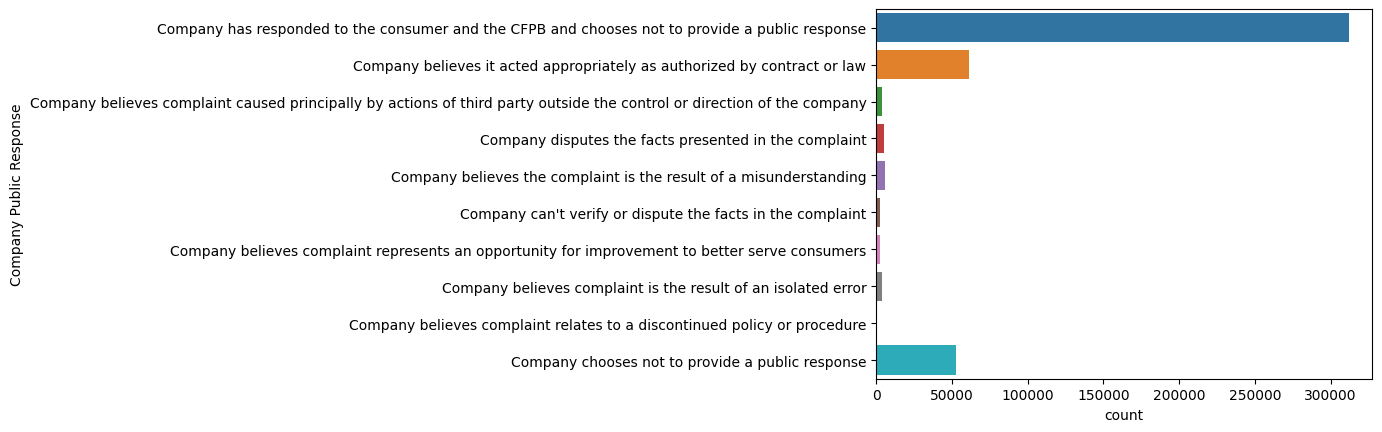

In [43]:
sns.countplot(data=df,y ='Company Public Response')

In [44]:
from datetime import datetime

In [45]:
df['Date Received']=pd.to_datetime(df['Date Received'])

In [46]:
df['year'] = df['Date Received'].dt.year
df['month'] = df['Date Received'].dt.month_name()
df['weekdays']=df['Date Received'].dt.day_name()

In [47]:
df

,Date Received,Product,Sub-Product,Issue,Sub-Issue,Consumer Complaint Narrative,Company Public Response,Company,State,Zip Code,...,Consumer Consent Provided?,Submitted Via,Date Sent To Company,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,year,month,weekdays
0,2019-05-10,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,...,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275,2019,May,Friday
1,2019-05-10,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,...,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228,2019,May,Friday
2,2019-05-10,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,...,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964,2019,May,Friday
3,2019-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,...,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479,2019,May,Friday
4,2019-05-10,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,...,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282350,2011-12-01,Credit card,NaN,Credit determination,NaN,NaN,NaN,"CITIBANK, N.A.",MO,63301,...,NaN,Web,12/02/2011,Closed with relief,Yes,No,2396,2011,December,Thursday
1282351,2011-12-01,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,...,NaN,Web,12/06/2011,Closed without relief,No,No,2323,2011,December,Thursday
1282352,2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,43207,...,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126,2011,December,Thursday
1282353,2011-12-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,...,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315,2011,December,Thursday


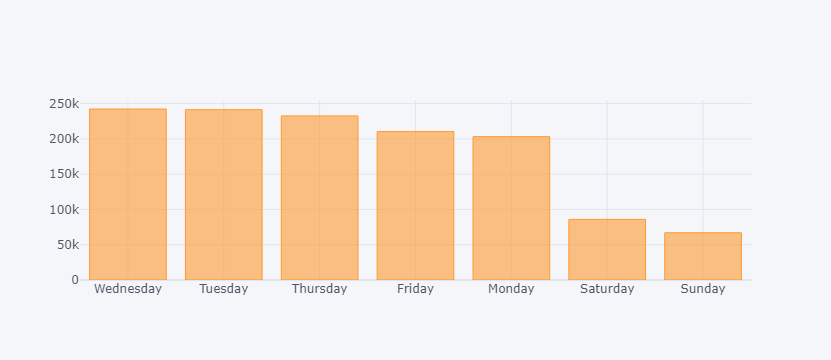

In [48]:
df['weekdays'].value_counts().iplot(kind = 'bar',fontsize=14)

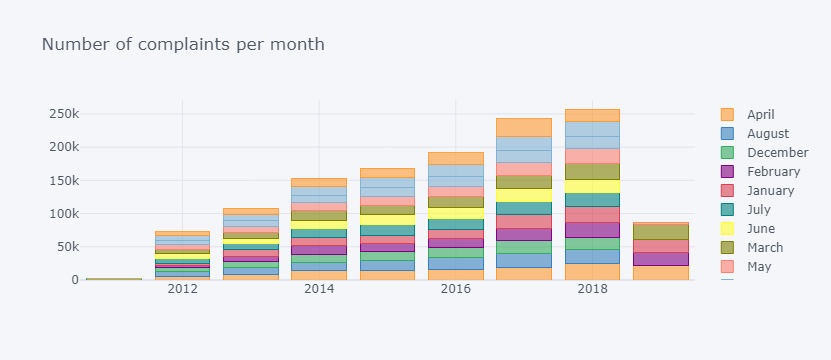

In [49]:
pd.crosstab(df['year'],df['month']).iplot(kind = 'bar',fontsize=14,barmode='stack',title = 'Number of complaints per month')

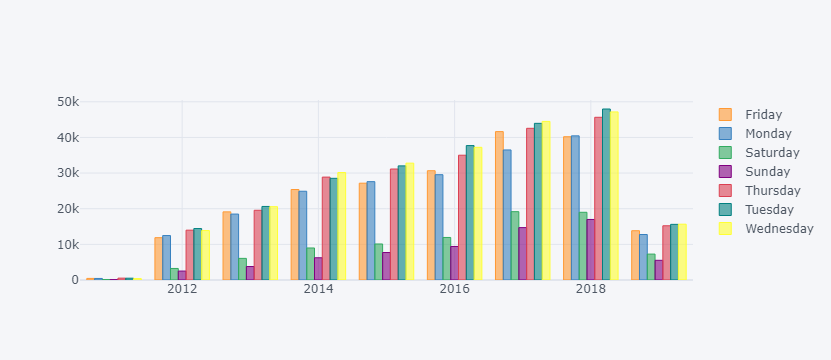

In [50]:
pd.crosstab(df['year'],df['weekdays']).iplot(kind='bar')

In [51]:
df['year'].value_counts()[0:1]

2018    257379
Name: year, dtype: int64

In [52]:
b=df.groupby(['Company Response To Consumer']).size()

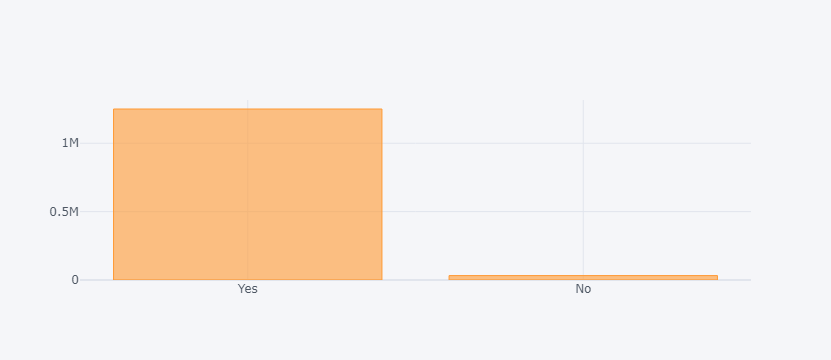

In [53]:
#sns.countplot(data=df,x = 'Timely Response?')
df['Timely Response?'].value_counts().iplot(kind = 'bar',fontsize=14)

In [54]:
b

Company Response To Consumer
Closed                              17611
Closed with explanation            993221
Closed with monetary relief         74243
Closed with non-monetary relief    158716
Closed with relief                   5304
Closed without relief               17868
In progress                          9277
Untimely response                    6108
dtype: int64

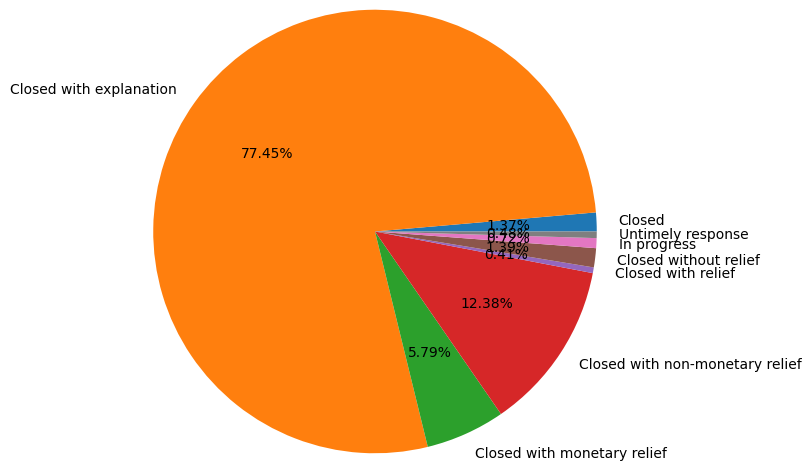

In [55]:
c=plt.pie(b,labels=b.index,autopct = '%1.2f%%',radius = 1.5)


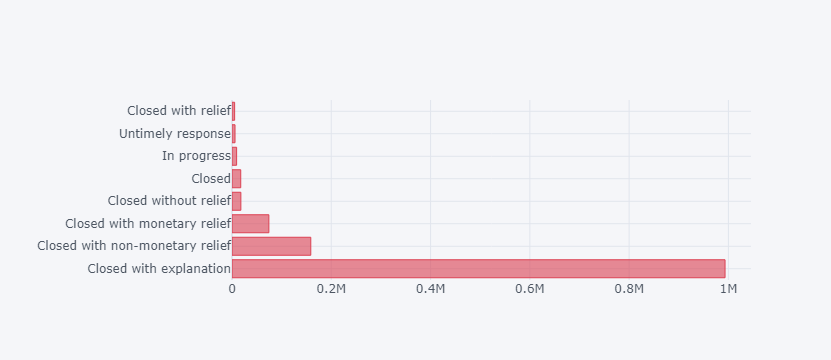

In [56]:
df['Company Response To Consumer'].value_counts().iplot(kind='barh',fontsize=14,color='red')

In [57]:
import geopandas

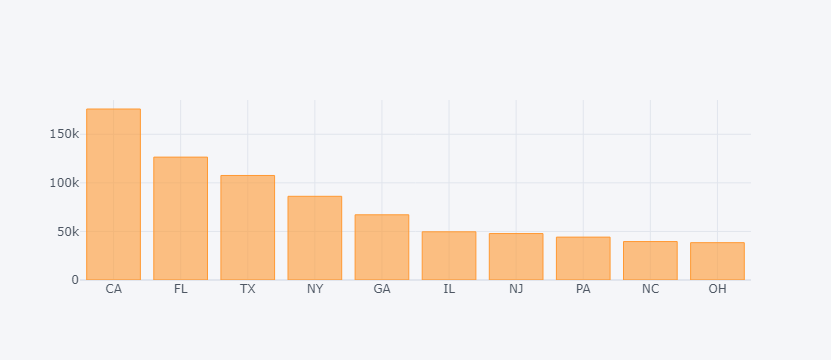

In [58]:
df['State'].value_counts()[0:10].iplot(kind='bar',fontsize=14)

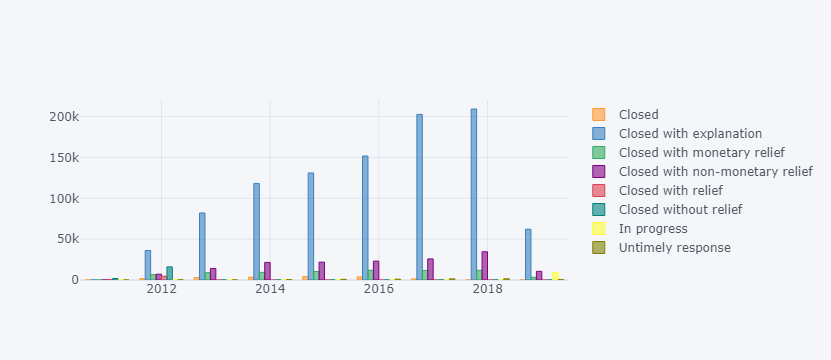

In [59]:
pd.crosstab(df['year'],df['Company Response To Consumer']).iplot(kind='bar')

In [60]:
sns.scatterplot

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

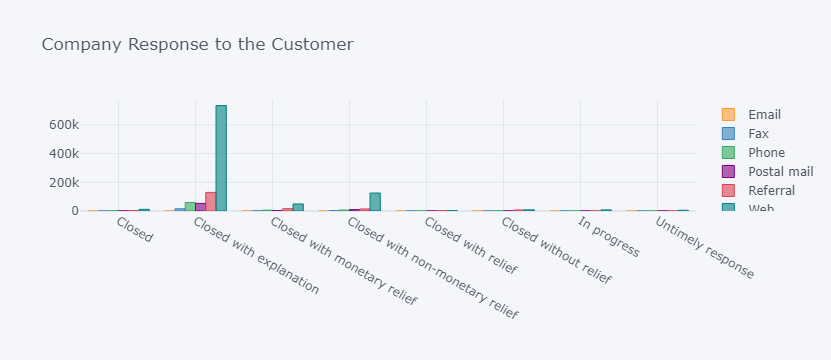

In [61]:
pd.crosstab(df['Company Response To Consumer'],df['Submitted Via']).iplot(kind='bar', title='Company Response to the Customer')


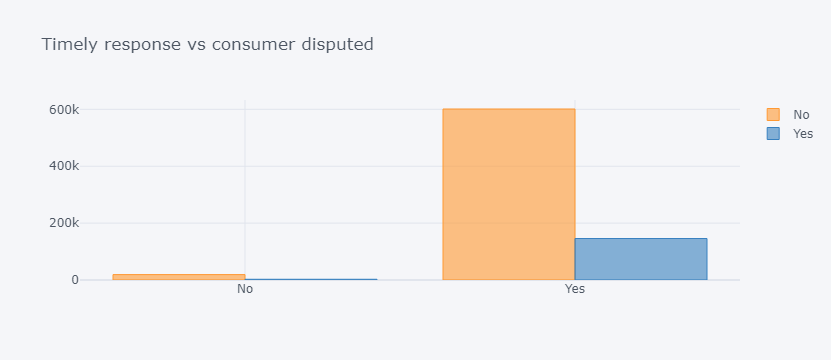

In [62]:
pd.crosstab(df['Timely Response?'],df['Consumer Disputed?']).iplot(kind = 'bar',title = 'Timely response vs consumer disputed')

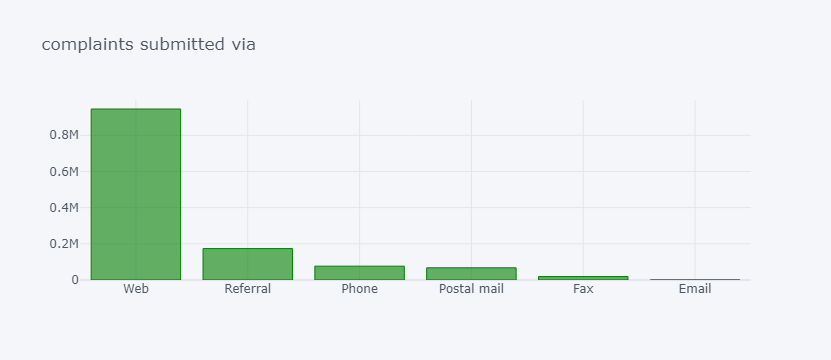

In [63]:
df['Submitted Via'].value_counts().iplot(kind='bar',title = 'complaints submitted via',color = 'green')

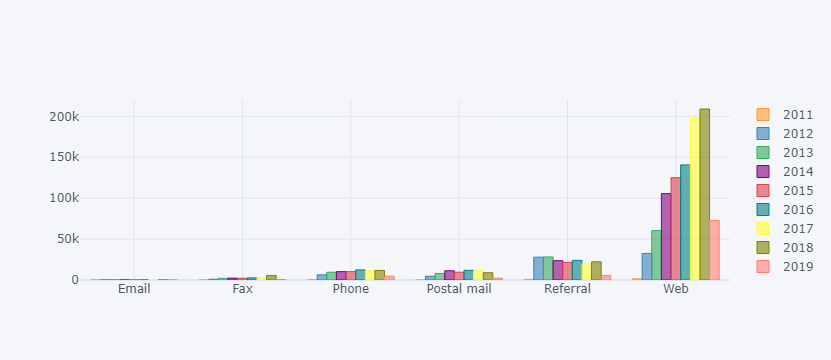

In [64]:
pd.crosstab(df['Submitted Via'],df['year']).iplot(kind='bar')

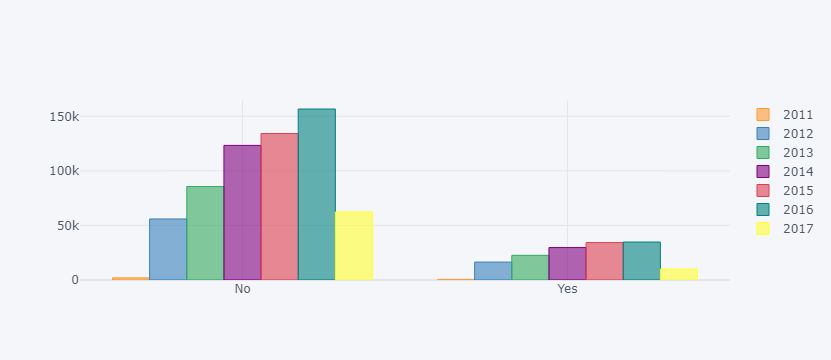

In [65]:
pd.crosstab(df['Consumer Disputed?'],df['year']).iplot(kind='bar')

In [66]:
b=[x for x in df.columns if df[x].isnull().mean()>0.5]

In [67]:
b

['Consumer Complaint Narrative', 'Company Public Response', 'Tags']

In [68]:
df.drop(b,inplace=True,axis=1)

In [69]:
df.isnull().sum()

Date Received                        0
Product                              0
Sub-Product                     235166
Issue                                0
Sub-Issue                       531186
Company                              0
State                            19400
Zip Code                        115298
Consumer Consent Provided?      591701
Submitted Via                        0
Date Sent To Company                 0
Company Response To Consumer         7
Timely Response?                     0
Consumer Disputed?              513854
Complaint Id                         0
year                                 0
month                                0
weekdays                             0
dtype: int64

In [70]:
a=df.dropna(subset=['Complaint Id'])

In [71]:
a.duplicated().sum()

0

In [72]:
a.shape

(1282355, 18)

In [73]:
a.isnull().sum()

Date Received                        0
Product                              0
Sub-Product                     235166
Issue                                0
Sub-Issue                       531186
Company                              0
State                            19400
Zip Code                        115298
Consumer Consent Provided?      591701
Submitted Via                        0
Date Sent To Company                 0
Company Response To Consumer         7
Timely Response?                     0
Consumer Disputed?              513854
Complaint Id                         0
year                                 0
month                                0
weekdays                             0
dtype: int64

In [74]:
a

,Date Received,Product,Sub-Product,Issue,Sub-Issue,Company,State,Zip Code,Consumer Consent Provided?,Submitted Via,Date Sent To Company,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,year,month,weekdays
0,2019-05-10,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NAVY FEDERAL CREDIT UNION,FL,328XX,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275,2019,May,Friday
1,2019-05-10,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228,2019,May,Friday
2,2019-05-10,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,CURO Intermediate Holdings,TX,751XX,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964,2019,May,Friday
3,2019-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,Ad Astra Recovery Services Inc,LA,708XX,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479,2019,May,Friday
4,2019-05-10,Checking or savings account,Checking account,Managing an account,Banking errors,ALLY FINANCIAL INC.,AZ,85205,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282350,2011-12-01,Credit card,NaN,Credit determination,NaN,"CITIBANK, N.A.",MO,63301,NaN,Web,12/02/2011,Closed with relief,Yes,No,2396,2011,December,Thursday
1282351,2011-12-01,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,NaN,Web,12/06/2011,Closed without relief,No,No,2323,2011,December,Thursday
1282352,2011-12-01,Credit card,NaN,Billing disputes,NaN,JPMORGAN CHASE & CO.,OH,43207,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126,2011,December,Thursday
1282353,2011-12-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315,2011,December,Thursday


In [75]:
a.drop(['Date Received','Sub-Product','Issue','Sub-Issue','Company','State','Zip Code','Date Sent To Company','Complaint Id','year','month','weekdays'],axis=1,inplace=True)

In [76]:
a.shape

(1282355, 6)

In [77]:
a

,Product,Consumer Consent Provided?,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?
0,Checking or savings account,NaN,Web,In progress,Yes,NaN
1,Checking or savings account,NaN,Referral,Closed with explanation,Yes,NaN
2,Debt collection,NaN,Web,Closed with explanation,Yes,NaN
3,"Credit reporting, credit repair services, or o...",NaN,Web,Closed with explanation,Yes,NaN
4,Checking or savings account,NaN,Postal mail,In progress,Yes,NaN
...,...,...,...,...,...,...
1282350,Credit card,NaN,Web,Closed with relief,Yes,No
1282351,Mortgage,NaN,Web,Closed without relief,No,No
1282352,Credit card,NaN,Referral,Closed with relief,Yes,No
1282353,Mortgage,NaN,Web,Closed with relief,Yes,No


In [78]:
a.isnull().sum()

Product                              0
Consumer Consent Provided?      591701
Submitted Via                        0
Company Response To Consumer         7
Timely Response?                     0
Consumer Disputed?              513854
dtype: int64

In [79]:
a.shape

(1282355, 6)

In [80]:
a.drop(['Consumer Consent Provided?'],axis=1,inplace=True)

In [81]:
a.shape

(1282355, 5)

In [82]:
a.dropna(inplace=True)

In [83]:
a.shape

(768500, 5)

In [84]:
a.duplicated().sum()

767595

In [85]:
a

,Product,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?
513854,Mortgage,Web,Closed with explanation,Yes,No
513855,Credit reporting,Web,Closed with explanation,Yes,No
513856,Mortgage,Web,Closed with non-monetary relief,Yes,No
513857,Credit card,Web,Closed with explanation,Yes,No
513858,Credit card,Web,Closed with explanation,Yes,No
...,...,...,...,...,...
1282350,Credit card,Web,Closed with relief,Yes,No
1282351,Mortgage,Web,Closed without relief,No,No
1282352,Credit card,Referral,Closed with relief,Yes,No
1282353,Mortgage,Web,Closed with relief,Yes,No


In [86]:
a.nunique()

Product                         13
Submitted Via                    6
Company Response To Consumer     7
Timely Response?                 2
Consumer Disputed?               2
dtype: int64

In [87]:
a.isnull().sum()

Product                         0
Submitted Via                   0
Company Response To Consumer    0
Timely Response?                0
Consumer Disputed?              0
dtype: int64

In [88]:
a.shape

(768500, 5)

In [89]:
a.isnull().sum()

Product                         0
Submitted Via                   0
Company Response To Consumer    0
Timely Response?                0
Consumer Disputed?              0
dtype: int64

In [90]:
a

,Product,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?
513854,Mortgage,Web,Closed with explanation,Yes,No
513855,Credit reporting,Web,Closed with explanation,Yes,No
513856,Mortgage,Web,Closed with non-monetary relief,Yes,No
513857,Credit card,Web,Closed with explanation,Yes,No
513858,Credit card,Web,Closed with explanation,Yes,No
...,...,...,...,...,...
1282350,Credit card,Web,Closed with relief,Yes,No
1282351,Mortgage,Web,Closed without relief,No,No
1282352,Credit card,Referral,Closed with relief,Yes,No
1282353,Mortgage,Web,Closed with relief,Yes,No


In [91]:
a.reset_index(inplace=True)

In [92]:
a

,index,Product,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?
0,513854,Mortgage,Web,Closed with explanation,Yes,No
1,513855,Credit reporting,Web,Closed with explanation,Yes,No
2,513856,Mortgage,Web,Closed with non-monetary relief,Yes,No
3,513857,Credit card,Web,Closed with explanation,Yes,No
4,513858,Credit card,Web,Closed with explanation,Yes,No
...,...,...,...,...,...,...
768495,1282350,Credit card,Web,Closed with relief,Yes,No
768496,1282351,Mortgage,Web,Closed without relief,No,No
768497,1282352,Credit card,Referral,Closed with relief,Yes,No
768498,1282353,Mortgage,Web,Closed with relief,Yes,No


In [93]:
a.drop(['index'],axis=1,inplace=True)

In [94]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768500 entries, 0 to 768499
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       768500 non-null  object
 1   Submitted Via                 768500 non-null  object
 2   Company Response To Consumer  768500 non-null  object
 3   Timely Response?              768500 non-null  object
 4   Consumer Disputed?            768500 non-null  object
dtypes: object(5)
memory usage: 29.3+ MB


In [95]:
a.columns

Index(['Product', 'Submitted Via', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?'],
      dtype='object')

In [96]:
a[['Product', 'Submitted Via', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?']].describe().transpose()

,count,unique,top,freq
Product,768500,13,Mortgage,226899
Submitted Via,768500,6,Web,523095
Company Response To Consumer,768500,7,Closed with explanation,577876
Timely Response?,768500,2,Yes,746963
Consumer Disputed?,768500,2,No,620122


In [97]:
a=pd.get_dummies(data=a,columns=['Product','Submitted Via','Company Response To Consumer','Timely Response?'],drop_first=True)

In [98]:
a

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,No,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,No,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,No,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,No,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,No,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,No,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,No,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,No,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,No,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [99]:
a['Consumer Disputed?']=a['Consumer Disputed?'].map({'Yes':1,'No':0})

In [100]:
a

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [101]:
a.duplicated().sum()

767595

In [102]:
a.corr()

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
Consumer Disputed?,1.000000,-0.000966,0.011104,0.010124,-0.042661,-0.021211,-0.009977,0.054641,-0.000486,-0.010650,...,-0.040425,-0.036214,0.064733,0.084896,-0.059145,-0.073236,-0.012586,0.029776,-0.030706,0.031725
Product_Checking or savings account,-0.000966,1.000000,-0.000409,-0.000716,-0.000934,-0.000956,-0.000165,-0.001279,-0.000073,-0.000168,...,-0.000514,0.004314,-0.002885,-0.000390,-0.000529,0.001253,-0.000165,-0.000305,-0.000124,-0.003655
Product_Consumer Loan,0.011104,-0.000409,1.000000,-0.075041,-0.097928,-0.100225,-0.017346,-0.134045,-0.007693,-0.017654,...,-0.018637,-0.034601,0.029915,0.027758,-0.000552,-0.024626,-0.010300,-0.019168,0.004606,-0.014106
Product_Credit card,0.010124,-0.000716,-0.075041,1.000000,-0.171338,-0.175358,-0.030350,-0.234531,-0.013460,-0.030888,...,-0.005137,-0.007973,0.006963,-0.126266,0.202826,-0.019337,0.093846,0.060234,-0.017773,0.037355
Product_Credit reporting,-0.042661,-0.000934,-0.097928,-0.171338,1.000000,-0.228840,-0.039606,-0.306060,-0.017565,-0.040308,...,0.127606,-0.131151,0.086084,-0.040840,-0.116352,0.218614,-0.039420,-0.072955,-0.028121,0.074233
Product_Debt collection,-0.021211,-0.000956,-0.100225,-0.175358,-0.228840,1.000000,-0.040536,-0.313241,-0.017977,-0.041254,...,-0.042817,-0.136765,0.134502,0.022373,-0.104323,0.041509,-0.040345,-0.074667,0.073294,-0.132304
Product_Money transfers,-0.009977,-0.000165,-0.017346,-0.030350,-0.039606,-0.040536,1.000000,-0.054214,-0.003111,-0.007140,...,-0.013174,-0.030139,-0.000178,0.013441,0.019169,-0.020532,-0.006983,-0.012923,-0.005276,0.000383
Product_Mortgage,0.054641,-0.001279,-0.134045,-0.234531,-0.306060,-0.313241,-0.054214,1.000000,-0.024044,-0.055175,...,-0.014229,0.186679,-0.145155,0.119227,-0.099896,-0.125773,-0.005823,0.101357,-0.019809,0.026977
Product_Other financial service,-0.000486,-0.000073,-0.007693,-0.013460,-0.017565,-0.017977,-0.003111,-0.024044,1.000000,-0.003167,...,0.005030,-0.000336,-0.009768,0.003304,0.006488,-0.009732,-0.003097,-0.005731,0.012197,-0.017709
Product_Payday loan,-0.010650,-0.000168,-0.017654,-0.030888,-0.040308,-0.041254,-0.007140,-0.055175,-0.003167,1.000000,...,-0.017558,-0.033275,0.040149,0.016383,-0.006073,-0.022165,-0.007106,-0.013152,0.051978,-0.041423


<AxesSubplot:>

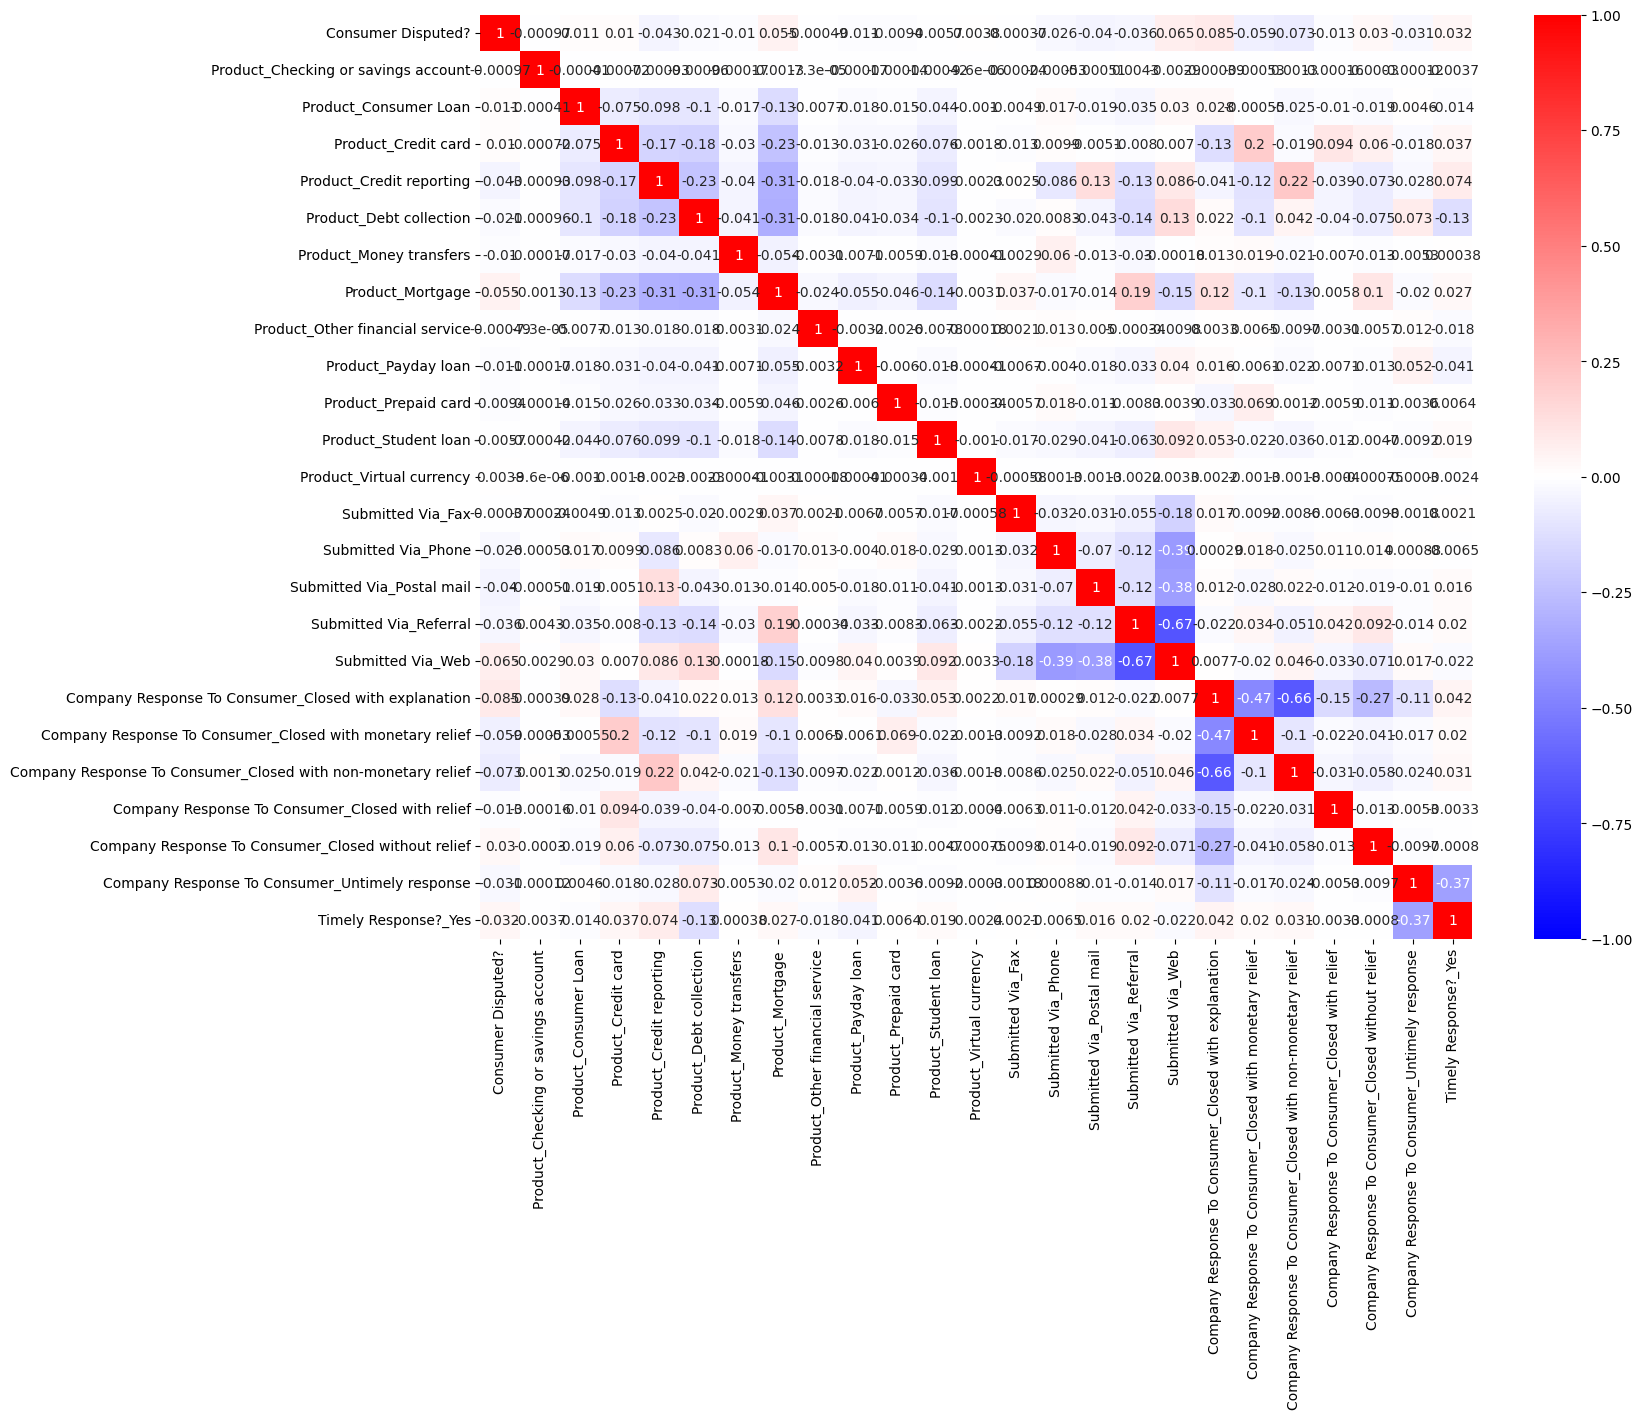

In [103]:
plt.figure(figsize=(16,12))
sns.heatmap(a.corr(),annot=True,vmin=-1,vmax=1,cmap='bwr')

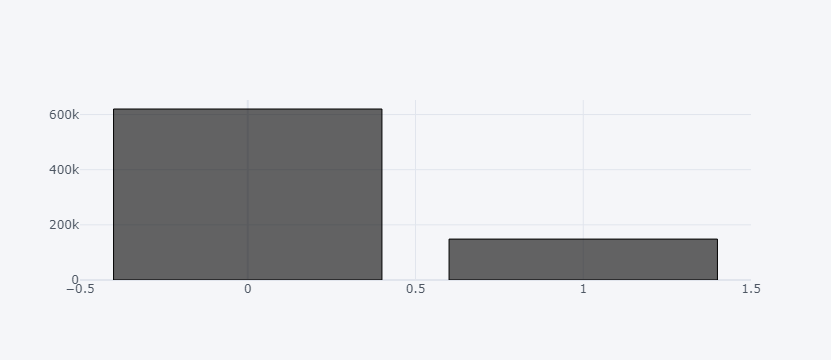

In [104]:
a['Consumer Disputed?'].value_counts().iplot(kind='bar',color='black')

In [105]:
a.to_csv('consumer.csv',index=False)

In [106]:
x = a.drop(['Consumer Disputed?'],axis=1)

In [107]:
x.shape

(768500, 24)

In [108]:
y=a['Consumer Disputed?']
y

0         0
1         0
2         0
3         0
4         0
         ..
768495    0
768496    0
768497    0
768498    0
768499    0
Name: Consumer Disputed?, Length: 768500, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [112]:
r= RandomForestClassifier().fit(x_train,y_train)

In [113]:
p=r.predict(x_test)

In [114]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    192110
           1       0.00      0.27      0.00        15

    accuracy                           0.81    192125
   macro avg       0.50      0.54      0.45    192125
weighted avg       1.00      0.81      0.89    192125



In [115]:
print(confusion_matrix(p,y_test))

[[154864  37246]
 [    11      4]]


In [116]:
train_percent=r.score(x_train,y_train)
test_percent = r.score(x_test,y_test)
print(f"Train Accuracy={train_percent*100}%")
print(f"Test Accuracy={test_percent*100}%")

Train Accuracy=80.72123183691173%
Test Accuracy=80.60793754066363%


In [117]:
a

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [118]:
a.duplicated().sum()

767595

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
sm = SMOTE(random_state = 2)
X, Y = sm.fit_resample(x, y)

In [121]:
X

,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240239,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1240240,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1240241,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1240242,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [122]:
X.columns

Index(['Product_Checking or savings account', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Money transfers',
       'Product_Mortgage', 'Product_Other financial service',
       'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted Via_Fax', 'Submitted Via_Phone',
       'Submitted Via_Postal mail', 'Submitted Via_Referral',
       'Submitted Via_Web',
       'Company Response To Consumer_Closed with explanation',
       'Company Response To Consumer_Closed with monetary relief',
       'Company Response To Consumer_Closed with non-monetary relief',
       'Company Response To Consumer_Closed with relief',
       'Company Response To Consumer_Closed without relief',
       'Company Response To Consumer_Untimely response',
       'Timely Response?_Yes'],
      dtype='object')

In [123]:
Y.shape

(1240244,)

In [124]:
print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y == 0)))

After OverSampling, the shape of train_X: (1240244, 24)
After OverSampling, the shape of train_y: (1240244,) 

After OverSampling, counts of label '1': 620122
After OverSampling, counts of label '0': 620122


In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [126]:
X_train

,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
1043357,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
936691,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
380459,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
424091,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1089473,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402693,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
131615,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
164588,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
22211,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [127]:
Y_train

1043357    1
936691     1
380459     1
424091     0
1089473    1
          ..
402693     0
131615     0
164588     1
22211      0
368362     1
Name: Consumer Disputed?, Length: 930183, dtype: int64

In [128]:
from xgboost import XGBClassifier

In [129]:
xg = XGBClassifier().fit(X_train,Y_train)

In [130]:
pr = xg.predict(X_test)

In [131]:
print(classification_report(pr,Y_test))

              precision    recall  f1-score   support

           0       0.39      0.63      0.48     96582
           1       0.77      0.56      0.65    213479

    accuracy                           0.58    310061
   macro avg       0.58      0.59      0.56    310061
weighted avg       0.65      0.58      0.60    310061



In [132]:
print(confusion_matrix(pr,Y_test))

[[ 60630  35952]
 [ 94307 119172]]


In [133]:
train_percent=r.score(X_train,Y_train)
test_percent = r.score(X_test,Y_test)
print(f"Train Accuracy={train_percent*100}%")
print(f"Test Accuracy={test_percent*100}%")

Train Accuracy=50.01521206042252%
Test Accuracy=49.977585055843846%


In [134]:
from sklearn.model_selection import StratifiedKFold 

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
#cross validation
skf = StratifiedKFold(n_splits=5)
model = XGBClassifier()
s = cross_val_score(model,X,Y,cv=skf)
print(np.mean(s))

0.5318871893693721


In [137]:
skf = StratifiedKFold(n_splits=5)
model = RandomForestClassifier()
s = cross_val_score(model,X,Y,cv=skf)
print(np.mean(s))

0.5319283102281764


In [138]:
a

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [139]:
import copy

In [140]:
df1 = copy.deepcopy(a)

In [141]:
df1

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [142]:
df1.duplicated().sum()

767595

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768500 entries, 0 to 768499
Data columns (total 25 columns):
 #   Column                                                        Non-Null Count   Dtype
---  ------                                                        --------------   -----
 0   Consumer Disputed?                                            768500 non-null  int64
 1   Product_Checking or savings account                           768500 non-null  uint8
 2   Product_Consumer Loan                                         768500 non-null  uint8
 3   Product_Credit card                                           768500 non-null  uint8
 4   Product_Credit reporting                                      768500 non-null  uint8
 5   Product_Debt collection                                       768500 non-null  uint8
 6   Product_Money transfers                                       768500 non-null  uint8
 7   Product_Mortgage                                              768500 non-n

In [144]:
df1.isnull().sum()

Consumer Disputed?                                              0
Product_Checking or savings account                             0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_Debt collection                                         0
Product_Money transfers                                         0
Product_Mortgage                                                0
Product_Other financial service                                 0
Product_Payday loan                                             0
Product_Prepaid card                                            0
Product_Student loan                                            0
Product_Virtual currency                                        0
Submitted Via_Fax                                               0
Submitted Via_Phone                                             0
Submitted 

In [145]:
df1.dropna(subset='Consumer Disputed?',inplace=True)

In [146]:
df1.isnull().sum()

Consumer Disputed?                                              0
Product_Checking or savings account                             0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_Debt collection                                         0
Product_Money transfers                                         0
Product_Mortgage                                                0
Product_Other financial service                                 0
Product_Payday loan                                             0
Product_Prepaid card                                            0
Product_Student loan                                            0
Product_Virtual currency                                        0
Submitted Via_Fax                                               0
Submitted Via_Phone                                             0
Submitted 

In [147]:
df1.shape

(768500, 25)

In [148]:
df1.fillna('missing',inplace=True)

In [149]:
df1.isnull().sum()

Consumer Disputed?                                              0
Product_Checking or savings account                             0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_Debt collection                                         0
Product_Money transfers                                         0
Product_Mortgage                                                0
Product_Other financial service                                 0
Product_Payday loan                                             0
Product_Prepaid card                                            0
Product_Student loan                                            0
Product_Virtual currency                                        0
Submitted Via_Fax                                               0
Submitted Via_Phone                                             0
Submitted 

In [150]:
df1.shape

(768500, 25)

In [151]:
df1

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [152]:
df1.isnull().sum()

Consumer Disputed?                                              0
Product_Checking or savings account                             0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_Debt collection                                         0
Product_Money transfers                                         0
Product_Mortgage                                                0
Product_Other financial service                                 0
Product_Payday loan                                             0
Product_Prepaid card                                            0
Product_Student loan                                            0
Product_Virtual currency                                        0
Submitted Via_Fax                                               0
Submitted Via_Phone                                             0
Submitted 

In [153]:
df1.duplicated().sum()

767595

In [154]:
df1

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [155]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Consumer Disputed?,768500.0,0.193075,0.394711,0.0,0.0,0.0,0.0,1.0
Product_Checking or savings account,768500.0,0.000004,0.001976,0.0,0.0,0.0,0.0,1.0
Product_Consumer Loan,768500.0,0.041126,0.198581,0.0,0.0,0.0,0.0,1.0
Product_Credit card,768500.0,0.116057,0.320294,0.0,0.0,0.0,0.0,1.0
Product_Credit reporting,768500.0,0.182735,0.386450,0.0,0.0,0.0,0.0,1.0
Product_Debt collection,768500.0,0.189764,0.392115,0.0,0.0,0.0,0.0,1.0
Product_Money transfers,768500.0,0.006967,0.083176,0.0,0.0,0.0,0.0,1.0
Product_Mortgage,768500.0,0.295249,0.456155,0.0,0.0,0.0,1.0,1.0
Product_Other financial service,768500.0,0.001378,0.037096,0.0,0.0,0.0,0.0,1.0
Product_Payday loan,768500.0,0.007214,0.084629,0.0,0.0,0.0,0.0,1.0


In [156]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import losses,datasets,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [157]:
df1.to_csv('consumer_ANN.csv',index=False)